In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

 every image is represented as a 28×28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0)

In [14]:
# scaling the input since we are using Gradient Descent
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
# understanding the class labels

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
y_train[0]

4

In [18]:
class_names[y_train[0]]

'Coat'

In [19]:
# creating a model using the sequential API
model = keras.models.Sequential()

In [20]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers

In [27]:
# Looking at the weights, and biases of the model
weights, biases = model.get_layer('dense_1').get_weights()

In [28]:
weights

array([[-0.01128004, -0.00735682,  0.09361725, ..., -0.09209834,
        -0.08681822, -0.03004577],
       [ 0.05650689, -0.00498833,  0.05840374, ..., -0.01784371,
        -0.06637096,  0.11309985],
       [-0.02546272, -0.08141825,  0.08683679, ..., -0.00883499,
        -0.0058987 , -0.06083787],
       ...,
       [ 0.00953818,  0.03811146, -0.00605261, ...,  0.0470515 ,
        -0.05743313,  0.04480235],
       [-0.09500621,  0.02215839, -0.05008762, ...,  0.03873315,
         0.00718696,  0.09941693],
       [ 0.03429104,  0.0424263 , -0.1135316 , ...,  0.11729642,
        -0.01590876,  0.03119291]], dtype=float32)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [30]:
#you can set kernel_initializer (kernel is another name for the matrix of connec‐ tion weights) or bias_initializer when creating the layer

In [31]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 49us/sample - loss: 0.7224 - accuracy: 0.7591 - val_loss: 0.5125 - val_accuracy: 0.8282
Epoch 2/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.4948 - accuracy: 0.8273 - val_loss: 0.4814 - val_accuracy: 0.8312
Epoch 3/30
55000/55000 [==============================] - 2s 43us/sample - loss: 0.4480 - accuracy: 0.8432 - val_loss: 0.4308 - val_accuracy: 0.8482
Epoch 4/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.4196 - accuracy: 0.8533 - val_loss: 0.3980 - val_accuracy: 0.8656
Epoch 5/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.3999 - accuracy: 0.8596 - val_loss: 0.3863 - val_accuracy: 0.8644
Epoch 6/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.3835 - accuracy: 0.8664 - val_loss: 0.3899 - val_accuracy: 0.8616
Epoch 7/30
55000/55000 [==============================] -

In [33]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [36]:
history.history

{'loss': [0.7223682985956018,
  0.4947564394604076,
  0.44802508129856805,
  0.4196484719016335,
  0.39993995835130863,
  0.3835165087526495,
  0.3697991550055417,
  0.3577111726630818,
  0.3473910493590615,
  0.33842482429200954,
  0.32880902249596333,
  0.3205253321951086,
  0.3122899998426437,
  0.306469693498178,
  0.29909581359083004,
  0.2931331576889212,
  0.28775002394806254,
  0.28205479870709504,
  0.27640809055458415,
  0.2723044556942853,
  0.2667009500850331,
  0.2614359555883841,
  0.2579382946469567,
  0.2528232771645893,
  0.2490648357413032,
  0.24371447787772527,
  0.24048340202895077,
  0.2360901727123694,
  0.23215109536431053,
  0.22829796201315794],
 'accuracy': [0.7591091,
  0.82732725,
  0.8432182,
  0.85327274,
  0.85963637,
  0.86643636,
  0.8692182,
  0.87307274,
  0.8778727,
  0.8797455,
  0.88356364,
  0.8852364,
  0.8880182,
  0.8903818,
  0.89214545,
  0.8949091,
  0.8965091,
  0.8998727,
  0.90043634,
  0.9025091,
  0.9026909,
  0.90549093,
  0.9080727,


In [39]:
# Looking at the learning curves
import pandas as pd
import matplotlib.pyplot as plt

(0, 1)

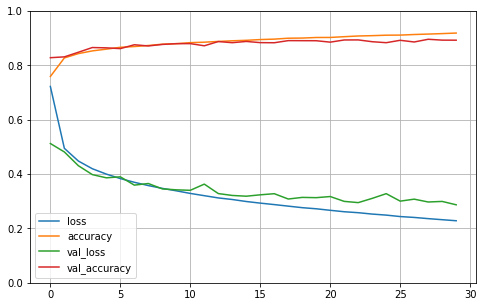

In [40]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [41]:
# may be a little bit of overfitting. Not much they seem close to each other

In [ ]:
# loss seems to be going down in the validation set. So, we could train further.
#It’s as simple as calling the fit() method again, since Keras just continues train‐ ing where it left off 

In [42]:
history = model.fit(X_train, y_train, epochs=5, 
                    validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 2s 44us/sample - loss: 0.2247 - accuracy: 0.9193 - val_loss: 0.3005 - val_accuracy: 0.8960
Epoch 2/5
55000/55000 [==============================] - 2s 44us/sample - loss: 0.2216 - accuracy: 0.9206 - val_loss: 0.2926 - val_accuracy: 0.8930
Epoch 3/5
55000/55000 [==============================] - 2s 42us/sample - loss: 0.2171 - accuracy: 0.9221 - val_loss: 0.2993 - val_accuracy: 0.8876
Epoch 4/5
55000/55000 [==============================] - 2s 43us/sample - loss: 0.2138 - accuracy: 0.9243 - val_loss: 0.2938 - val_accuracy: 0.8976
Epoch 5/5
55000/55000 [==============================] - 2s 43us/sample - loss: 0.2100 - accuracy: 0.9244 - val_loss: 0.2995 - val_accuracy: 0.8974


In [43]:
# Evaluating the test set
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 31us/sample - loss: 70.7952 - accuracy: 0.8477


[70.79522146884202, 0.8477]